Overall, the notebook serves as a valuable tool for sentiment analysis and topic modeling of user reviews, providing actionable insights for improving the JMO Jamsostek Mobile application based on user feedback.

- The notebook begins with the importation of necessary libraries and packages essential for data processing and analysis and scraping user reviews of the JMO Jamsostek Mobile app from the App Store.
- Preprocessing steps involve lowercasing, removal of non-alphabetic characters, stopword removal, stemming, and addressing common typos in the Indonesian language to enhance the quality of the text data.
- Tokenization of the cleaned reviews is performed to break down the text into individual words or tokens, facilitating subsequent analysis.
- Latent Dirichlet Allocation (LDA) is employed to analyze **negative reviews** specifically, uncovering prevalent themes or topics within them, includes determining the optimal number of topics for topic modeling analysis with visualizations, such as bar charts illustrating the distribution of dominant topics within the negative reviews, aid in the interpretation of topic modeling results

In [ ]:
# !pip install PySastrawi
# !pip install pyLDAvis
# !pip install nltk
# !pip install matplotlib
# !pip install app-store-scraper
# !pip install pandas
# !pip install gensim
# !pip install scipy==1.10.1

In [1]:
import pandas as pd
import numpy as np
from app_store_scraper import AppStore

In [2]:
from datetime import datetime, timedelta

In [37]:
from google.cloud import bigquery
import json
from google.oauth2 import service_account
credential = service_account.Credentials.from_service_account_file(
            'credentials/sa_creds.json')
job_config = bigquery.LoadJobConfig(
                write_disposition="WRITE_APPEND",
                schema=[
                    # bigquery.SchemaField("date", "DATETIME"),
                    # bigquery.SchemaField("rating", "FLOAT"),
                    # bigquery.SchemaField("created_at", "DATETIME"),
                    # bigquery.SchemaField("job_id", "STRING"),
                ],)

client = bigquery.Client(credentials=credential, project='testdv')
job = client.load_table_from_dataframe(jmo_final, 'portfolio.appstorescrap_reason', job_config=job_config)
job.result()

LoadJob<project=testdv, location=asia-southeast2, id=bac0e170-32fe-487a-8a29-092acc2b1a55>

In [38]:
jmo = AppStore(country='id', app_name='jmo-jamsostek-mobile', app_id = '1444834757')
# Get today's date
today = datetime.today()

# Calculate one month ago
one_week_ago = today + timedelta(days=7)
jmo.review(after=one_week_ago)

2024-04-17 12:03:32,853 [INFO] Base - Initialised: AppStore('id', 'jmo-jamsostek-mobile', 1444834757)
2024-04-17 12:03:32,873 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/id/app/jmo-jamsostek-mobile/id1444834757
2024-04-17 12:03:40,362 [INFO] Base - [id:1444834757] Fetched 0 reviews (0 fetched in total)
2024-04-17 12:03:48,292 [INFO] Base - [id:1444834757] Fetched 0 reviews (0 fetched in total)
2024-04-17 12:03:56,770 [INFO] Base - [id:1444834757] Fetched 0 reviews (0 fetched in total)
2024-04-17 12:04:06,077 [INFO] Base - [id:1444834757] Fetched 0 reviews (0 fetched in total)
2024-04-17 12:04:13,633 [INFO] Base - [id:1444834757] Fetched 0 reviews (0 fetched in total)
2024-04-17 12:04:22,193 [INFO] Base - [id:1444834757] Fetched 0 reviews (0 fetched in total)
2024-04-17 12:04:37,069 [INFO] Base - [id:1444834757] Fetched 0 reviews (0 fetched in total)
2024-04-17 12:04:46,452 [INFO] Base - [id:1444834757] Fetched 0 reviews (0 fetched in total)
2024-04-17 12:04:57,743

In [39]:
jmo

AppStore(country='id', app_name='jmo-jamsostek-mobile', app_id=1444834757)

In [3]:
# Get today's date
today = datetime.today()

# Calculate one month ago
one_week_ago = today - timedelta(days=7)

In [4]:
jmo = AppStore(country='id', app_name='jmo-jamsostek-mobile', app_id = '1444834757')

2024-04-11 19:00:02,813 [INFO] Base - Initialised: AppStore('id', 'jmo-jamsostek-mobile', 1444834757)
2024-04-11 19:00:02,817 [INFO] Base - Ready to fetch reviews from: https://apps.apple.com/id/app/jmo-jamsostek-mobile/id1444834757


In [5]:
jmo.review()

2024-04-11 19:00:08,164 [INFO] Base - [id:1444834757] Fetched 100 reviews (100 fetched in total)
2024-04-11 19:00:15,696 [INFO] Base - [id:1444834757] Fetched 200 reviews (200 fetched in total)
2024-04-11 19:00:22,812 [INFO] Base - [id:1444834757] Fetched 300 reviews (300 fetched in total)
2024-04-11 19:00:29,680 [INFO] Base - [id:1444834757] Fetched 400 reviews (400 fetched in total)
2024-04-11 19:00:36,644 [INFO] Base - [id:1444834757] Fetched 500 reviews (500 fetched in total)
2024-04-11 19:00:43,794 [INFO] Base - [id:1444834757] Fetched 600 reviews (600 fetched in total)
2024-04-11 19:00:50,420 [INFO] Base - [id:1444834757] Fetched 700 reviews (700 fetched in total)
2024-04-11 19:00:57,300 [INFO] Base - [id:1444834757] Fetched 800 reviews (800 fetched in total)
2024-04-11 19:01:04,060 [INFO] Base - [id:1444834757] Fetched 900 reviews (900 fetched in total)
2024-04-11 19:01:11,385 [INFO] Base - [id:1444834757] Fetched 1000 reviews (1000 fetched in total)
2024-04-11 19:01:18,611 [INF

In [ ]:
# jmo.review(after=one_week_ago)

In [10]:
jmodf = pd.DataFrame(np.array(jmo.reviews),columns=['review'])
jmodf = jmodf.join(pd.DataFrame(jmodf.pop('review').tolist()))
jmodf.head()

,date,review,rating,isEdited,userName,title,developerResponse
0,2024-04-08 14:17:21,"min, aplikasi ga bisa dibuka selama sebulan eu...",1,False,gustih,app ios eror,NaN
1,2024-04-07 17:14:27,sekarang untuk klaim jht online sangat susah f...,1,False,angelina damayanti susanto,kecewa,NaN
2,2024-04-07 03:59:08,"Setiap login apk muncul tanda loading terus, h...",1,False,Alifah1234@,Aplikasi tidak berjalan baik,NaN
3,2024-04-07 02:44:21,Di iphone 7 plus ga bs di buka,1,False,Abyqwerty,Force quit,NaN
4,2024-04-06 09:00:38,Aplikasi sekelas pemerintah fapi kayak aplikas...,1,False,gunmang,KEBANYAKAN KORUPSI,NaN
5,2024-04-05 23:13:56,"Tolong dong nih aplikasi ditingkatkan lagi, ca...",1,False,qwbdgj,Gak jelas!!!,"{'id': 43105680, 'body': 'Yth. Bapak/Ibu pengg..."
6,2024-04-05 11:34:22,"Baru buka, loading, terus ketutup dengan sendi...",1,False,Resha grey,Ga bisa dibuka aplikasinya,"{'id': 43105805, 'body': 'Yth. Bapak/Ibu pengg..."
7,2024-04-05 09:51:44,Abis diperbaharui malah udah 2 minggu gabisa d...,1,False,hermawan123,Aplikasi jelek,"{'id': 43105864, 'body': 'Yth. Bapak/Ibu pengg..."
8,2024-04-05 07:49:17,"mau ambil hak aja di persulitnya minta ampun, ...",1,False,mndjdjeiaks,tolol,"{'id': 43105885, 'body': 'Yth. Bapak/Ibu pengg..."
9,2024-04-05 07:11:41,Proses verifikasi terlalu lama,1,False,dbfsj,Proses,"{'id': 43105937, 'body': 'Yth. Bapak/Ibu pengg..."


In [22]:
# jmodf.to_csv('jom_review_all_result.csv',index=False)

In [3]:
import pandas as pd
import numpy as np
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import RegexpTokenizer
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import re
import pyLDAvis.gensim_models
import pickle

In [424]:
random_state = 1000

In [4]:
jmo_final = pd.read_csv('jom_review_all_result.csv')

In [449]:
jmo_final_clean = jmo_final[['date', 'developerResponse', 'review', 'rating', 'userName',
       'title']].copy()

# Preprocessing func

In [450]:
# stem text
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#stopword
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

In [451]:
def clean_review(review):
    """
    Converts review to lowercase, removes non-alphabetic characters and stopwords, applies stemming
    """
    review = review.lower()
    review = re.sub(r'[^a-zA-Z]', ' ', review)
    review = re.sub(r'\s\s+', ' ', review)
    review = stopword.remove(review)
    review = stemmer.stem(review)
    return review

In [452]:
def tokenize_review(clean_review_df):
    """
   Tokenizes reviews, using a tokenizer object, and appends tokens to a list
    """
    texts = []
    tokenizer = RegexpTokenizer(r'\w+')
    for i in clean_review_df:
        tokens = tokenizer.tokenize(i)
        texts.append(tokens)
    return texts

In [453]:
# check duplication
jmo_final_clean[jmo_final_clean.duplicated()]

,date,developerResponse,review,rating,userName,title


In [454]:
processed_review = jmo_final_clean['review'].apply(lambda x: clean_review(x))

In [455]:
# convert empty string to nan
processed_review = processed_review.replace('', float("NaN"))

In [456]:
jmo_final_clean['review_processed'] = processed_review

In [457]:
jmo_final_clean.loc[jmo_final_clean['review_processed'].isna()]

,date,developerResponse,review,rating,userName,title,review_processed
1334,2023-02-24 16:11:50,"{'id': 38957515, 'body': 'Yth. Bapak/Ibu pengg...",Makin ke sini makin ke sana,1,tetanus221111,Ruwet,NaN
1796,2022-10-20 13:45:18,"{'id': 40896911, 'body': 'Yth. Bapak/Ibu pengg...",Baik,5,supryadi,Sangam bagus,NaN
2028,2022-09-29 23:13:34,"{'id': 41283100, 'body': 'Yth. Bapak/Ibu pengg...",👎👎👎👎,1,Payungmu,👎,NaN
2587,2022-08-30 14:01:48,"{'id': 41620917, 'body': 'Yth. Bapak/Ibu pengg...",🤮,1,M3lmelmel,Aplikasi Goblok,NaN
2839,2022-06-21 10:37:36,"{'id': 30907464, 'body': 'Yth. Bapak/Ibu pengg...",🥴,1,yanthykha,"Ribet, bisa login tapi gak bisa masuk ke menu2...",NaN
2855,2022-06-17 15:38:23,"{'id': 30907529, 'body': 'Yth. Bapak/Ibu pengg...",👎🏻👎🏻👎🏻👎🏻👍,1,nsjsiwownwbdushe,Goodjob! Aplikasi yg sangat useless,NaN
3540,2022-09-20 23:51:26,"{'id': 41361008, 'body': 'Yth. Bapak/Ibu pengg...",.,1,conthol,"Boro boro login, stuck di opening screen",NaN
4082,2021-02-09 09:44:14,"{'id': 41830620, 'body': 'Yth. Bapak/Ibu pengg...",👎🏻👎🏻👎🏻,1,gtopsw,👎🏻,NaN
4496,2019-07-19 20:48:28,"{'id': 42097642, 'body': 'Yth. Bapak/Ibu pengg...",👎👎👎👎👎,1,nalis3156,☝🏻,NaN


In [458]:
# drop nan value
jmo_final_clean.dropna(subset=['review_processed'], inplace=True)

In [459]:
jmo_final_clean[[len(i.split())==1 for i in jmo_final_clean['review_processed'].values]]

,date,developerResponse,review,rating,userName,title,review_processed
76,2024-03-31 02:26:51,"{'id': 43109279, 'body': 'Yth. Bapak/Ibu pengg...",Sering sekali harus di perbarui,5,dex mus,Terus out,baru
98,2024-03-28 16:51:48,"{'id': 43110331, 'body': 'Yth. Bapak/Ibu pengg...",Cacat,1,DharmaSatrya,Force update tapi bikin app gabisa dibuka,cacat
216,2024-03-02 08:42:09,"{'id': 42406273, 'body': 'Yth. Bapak/Ibu pengg...","Tidak bisa login sama sekali, bagaimana ini.",1,tono1796,Butuh perbaikan,login
231,2024-02-28 11:01:24,"{'id': 42406728, 'body': 'Yth. Bapak/Ibu pengg...",Sering eror,1,Rais B,Aplikasi kasihan,eror
232,2024-02-28 04:11:57,"{'id': 42406744, 'body': 'Yth. Bapak/Ibu pengg...",Error,1,Txhdhbdgsgs,Fitur pengkinian data,error
...,...,...,...,...,...,...,...
4493,2019-07-30 17:52:39,"{'id': 42097521, 'body': 'Yth. Bapak/Ibu pengg...",Sampah,1,Lost acc,Sampah,sampah
4632,2019-01-28 03:44:59,"{'id': 40555238, 'body': 'Yth. Bapak/Ibu pengg...",Apa bedanya?,2,hshejeoeie,BPJSTK Mobile vs BPJSTKU?,beda
4670,2019-01-10 06:52:05,"{'id': 11690730, 'body': 'Terimakasih Bapak/Ib...",Mantulll,5,arinyputri,😍👍🏻,mantulll
4682,2019-01-09 12:51:15,"{'id': 11690371, 'body': 'Terimakasih Bapak/Ib...",Mantul,5,Rizky Dwi S,Good,mantul


In [460]:
clean_token = tokenize_review(jmo_final_clean['review_processed'])

In [461]:
# check typo occurance if any & too many
word_count = {}
# Iterate through each sublist in the list of lists
for sublist in clean_token:
    # Iterate through each token in the sublist
    for token in sublist:
        # Update the count of the token in the dictionary
        word_count[token] = word_count.get(token, 0) + 1
# Assuming word_count is your dictionary containing word counts
sorted_word_count = dict(sorted(word_count.items(), key=lambda item: item[1], reverse=True))

# Print the sorted dictionary
print(sorted_word_count)

{'aplikasi': 2376, 'data': 1065, 'login': 1019, 'ga': 938, 'gak': 806, 'buka': 757, 'saldo': 716, 'aja': 681, 'kini': 652, 'yg': 633, 'cek': 625, 'tolong': 552, 'udah': 521, 'email': 504, 'baik': 500, 'gagal': 430, 'daftar': 419, 'update': 415, 'gabisa': 392, 'susah': 381, 'bpjs': 347, 'coba': 342, 'app': 320, 'banget': 318, 'klaim': 316, 'error': 311, 'bikin': 307, 'foto': 293, 'log': 288, 'salah': 285, 'in': 281, 'sulit': 273, 'verifikasi': 272, 'jmo': 262, 'akun': 256, 'jht': 240, 'pas': 240, 'gimana': 222, 'loading': 219, 'kantor': 215, 'suruh': 214, 'mudah': 208, 'kalo': 202, 'ios': 202, 'sih': 200, 'ulang': 200, 'password': 195, 'bagus': 189, 'mulu': 188, 'kartu': 188, 'apk': 185, 'muter': 183, 'bener': 180, 'gk': 172, 'udh': 169, 'bgt': 168, 'bantu': 166, 'muncul': 164, 'tp': 158, 'baru': 157, 'guna': 149, 'server': 143, 'biometrik': 141, 'sesuai': 141, 'apps': 140, 'perintah': 137, 'nomor': 135, 'gin': 133, 'pake': 131, 'fitur': 129, 'ganti': 128, 'no': 127, 'sampe': 124, 'laya

In [462]:
# Typo conversion function
def convert_typo(text):
    # Typo conversion dictionary
    typo_indo = {
        "apk" : "aplikasi",
        "gak" : "tidak",
        "ga" : "tidak",
        "gk" : "tidak",
        "gabisa" : "tidak bisa",
        "claim" : "klaim",
        "smua" : "semua",
        "application" : "aplikasi",
        "bner" : "benar",
        "bener" : "benar",
        "mw" : "mau",
        "ngak" : "tidak",
        "udah" : "sudah",
        "udh" : "sudah",
        "kalo" : "kalau",
        "can" : "bisa",
        "cannot" : "tidak bisa",
        "cant" : "tidak bisa",
        "yg" : "yang",
        "tp" : "tapi",
        "gw" : "saya",
        "aq" : "saya",
        "aku" : "saya",
        "ak" : "saya",
        "gua" : "saya",
        "gue" : "saya",
        "apps" : "aplikasi",
        "app" : "aplikasi",
        "not" : "tidak",
        "login" : "buka",
        "logout" : "keluar",
        "eror" : "error",
        "aja" : "saja",
        "bikin" : "daftar",
        "buat" : "daftar"
    }
    
    # Split the text into words
    words = text.split()
    # Iterate through each word
    for i, word in enumerate(words):
        # Check if the word exists in the typo_indo dictionary
        if word.lower() in typo_indo:
            # Replace the word with its corresponding value from the dictionary
            words[i] = typo_indo[word.lower()]

    # Join the words back into a single string
    converted_text = ' '.join(words)
    return converted_text


In [463]:
processed_review = jmo_final_clean['review_processed'].apply(lambda x: convert_typo(x))

In [464]:
jmo_final_clean['review_processed'] = processed_review

In [465]:
jmo_final_clean['review_processed'] = jmo_final_clean['review_processed'].apply(lambda x: clean_review(x))

In [466]:
# drop nan value
jmo_final_clean.dropna(subset=['review_processed'], inplace=True)

In [468]:
jmo_final_neg = jmo_final_clean.loc[jmo_final_clean['rating']<=2]

# Negative review

In [469]:
clean_token_neg = tokenize_review(jmo_final_neg['review_processed'])

In [470]:
# turn our tokenized documents into a id <-> term dictionary
dictionary_neg = corpora.Dictionary(clean_token_neg)

In [471]:
# remove the term if appears in less than 10 documents, appears in more than 0.5 total documents, save only  100000 terms
dictionary_neg.filter_extremes(no_below=20, no_above=0.5, keep_n=100000)

In [472]:
# convert tokenized documents into a document-term matrix
corpus_neg = [dictionary_neg.doc2bow(text) for text in clean_token_neg]

In [444]:
# jmo_final_neg[jmo_final_neg['review'].str.contains('daftar', case=False)]

In [473]:
#  extracts dominant topics and their percentages for a specified range of documents within a corpus based on a given topic model.
def topics_per_document(model, corpus, start=0, end=1):
  corpus_sel = corpus[start:end]
  dominant_topics = []
  topic_percentages = []
  for i, corp in enumerate(corpus_sel):
    topic_percs = model[corp]
    dominant_topic = sorted(topic_percs, key = lambda x:x[1], reverse=True)[0][0]
    dominant_topics.append((i, dominant_topic))
    topic_percentages.append(topic_percs)
  return(dominant_topics, topic_percentages)

## Decide optimum number of topics

In [474]:
def visualize_topics_neg(num_topics):
    # Create LDA model
    lda_model_neg = gensim.models.ldamodel.LdaModel(corpus=corpus_neg, id2word=dictionary_neg, num_topics=num_topics, random_state=random_state)
    
    # Get dominant topics and topic percentages
    dominant_topics, topic_percentages = topics_per_document(model=lda_model_neg, corpus=corpus_neg, start=0, end=4)

    # Distribution of Dominant Topics in Each Document
    df_dominant_topic = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
    dominant_topic_in_each_doc = df_dominant_topic.groupby('Dominant_Topic').size()
    df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

    # Total Topic Distribution by actual weight
    topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
    df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

    # Top 6 Keywords for each Topic
    topic_top6words = [(i, topic) for i, topics in lda_model_neg.show_topics(formatted=False)for j, (topic, wt) in enumerate(topics) if j < 6]
    df_top6words_stacked = pd.DataFrame(topic_top6words, columns=['topic_id', 'words'])
    df_top6words = df_top6words_stacked.groupby('topic_id').agg(', '.join)
    df_top6words.reset_index(level=0, inplace=True)

    df_dominant_topic_in_each_doc = pd.merge( df_top6words, df_dominant_topic_in_each_doc, how='left', right_on='Dominant_Topic', left_on='topic_id')[['topic_id', 'count']]
    df_dominant_topic_in_each_doc.fillna({'count':0}, inplace=True)
    fig, ax1 = plt.subplots(figsize=(15, 6))
    # Topic Distribution by Dominant Topics
    ax1.bar(x='topic_id', height='count', 
            data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
    ax1.set_xticks(range(df_dominant_topic_in_each_doc.topic_id.unique().__len__()))
    tick_formatter = FuncFormatter(lambda x, pos: 'T' + str(x)+', '+ df_top6words.loc[df_top6words.topic_id==x,'words'].values[0])
    ax1.xaxis.set_major_formatter(tick_formatter)
    ax1.set_title('Topic Review', fontdict=dict(size=10))
    ax1.set_ylabel('Count Review')
    ax1.set_ylim(0, 50)
    plt.xticks(rotation=90, ha='right')
    plt.show()
    return lda_model_neg

Number of Topics: 3


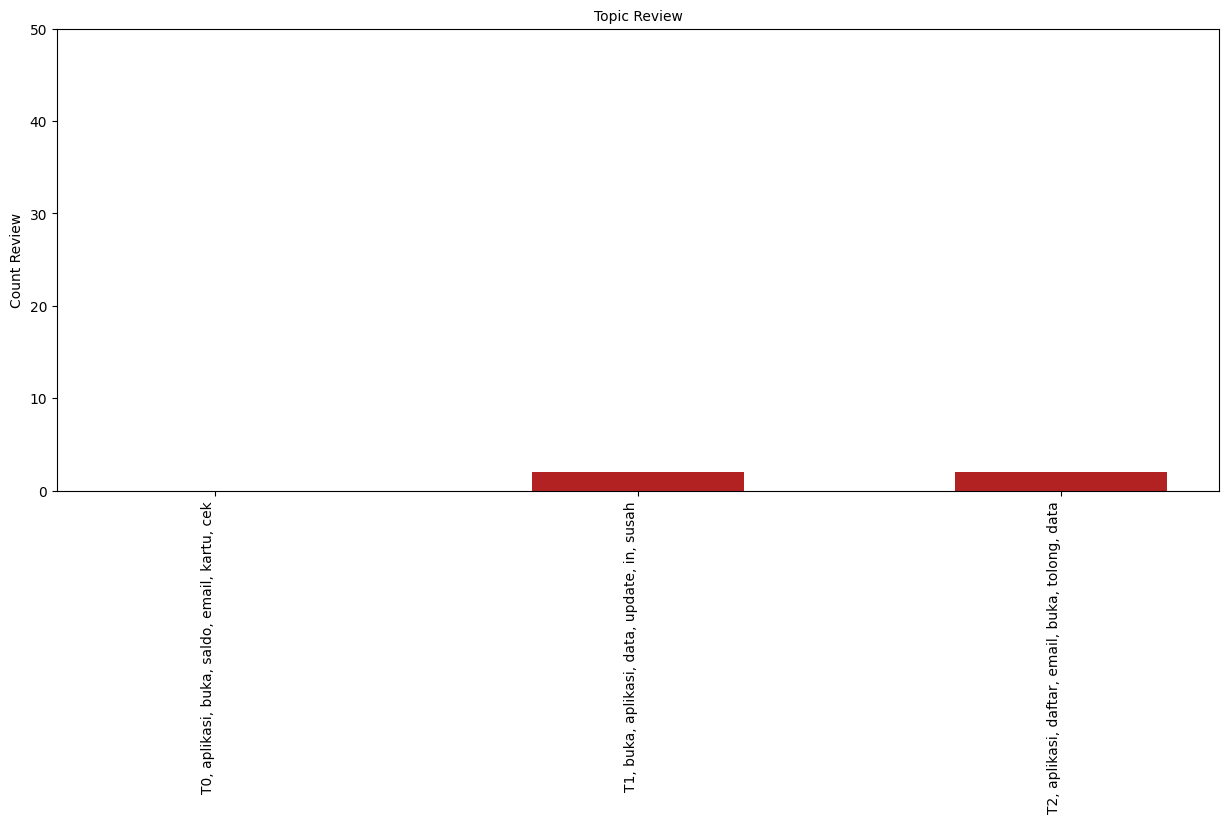

In [475]:
num_topics = 3
print(f"Number of Topics: {num_topics}")
lda_model_neg3= visualize_topics_neg(num_topics)

Number of Topics: 4


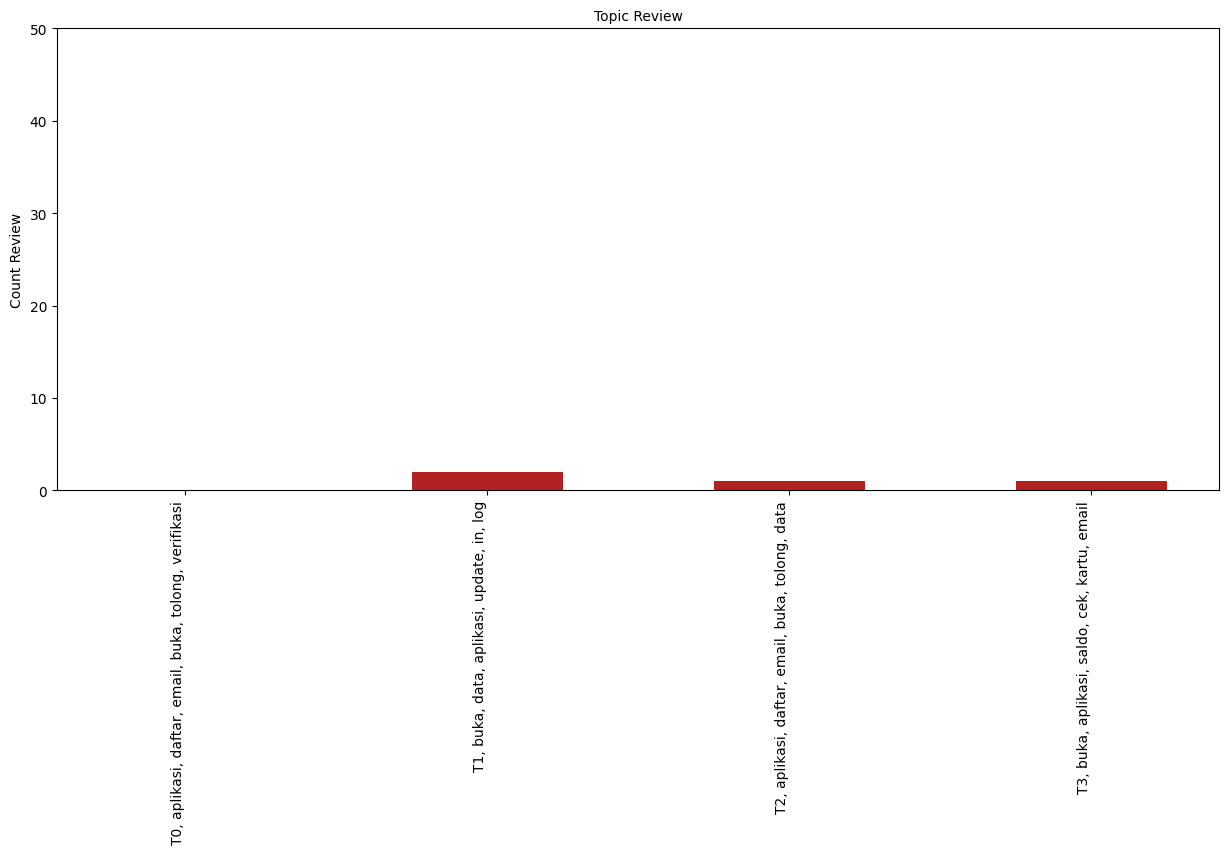

In [476]:
# List of num_topics
num_topics = 4
print(f"Number of Topics: {num_topics}")
lda_model_neg4=visualize_topics_neg(num_topics)

Number of Topics: 5


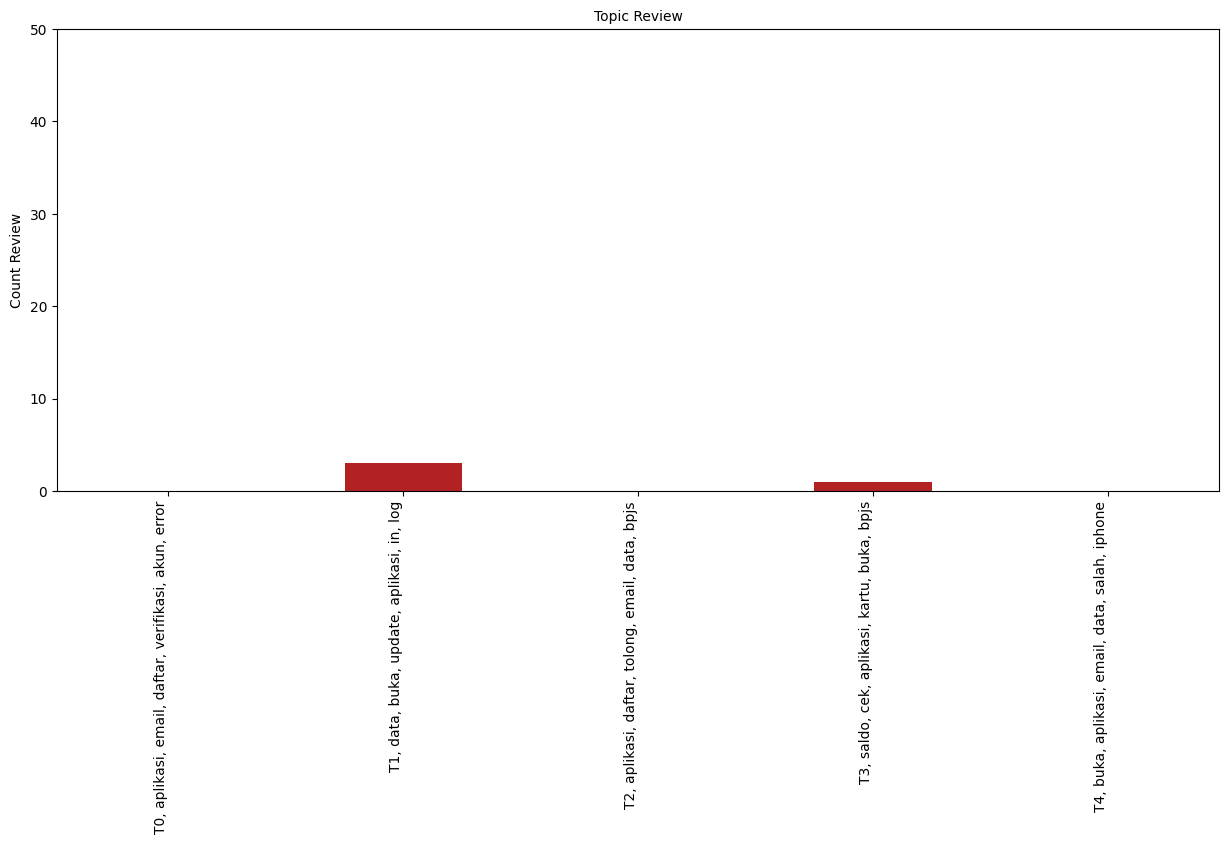

In [477]:
# List of num_topics
num_topics = 5
print(f"Number of Topics: {num_topics}")
lda_model_neg5=visualize_topics_neg(num_topics)

After experimenting with various numbers of topics for Latent Dirichlet Allocation (LDA) and visualizing the results, I have decided to proceed with 3 topics. This decision comes after observing significant topic overlap and complexity in the visualization when using a higher number of topics.

In [478]:
lda_model_neg3.save('lda_model')

In [480]:
import pyLDAvis
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model_neg3, corpus_neg, dictionary_neg)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.056124  0.065213       1        1  42.068262
1     -0.100167  0.005463       2        1  29.106182
0      0.044043 -0.070677       3        1  28.825556, topic_info=       Term         Freq        Total Category  logprob  loglift
0      buka  1995.000000  1995.000000  Default  30.0000  30.0000
9     saldo   534.000000   534.000000  Default  29.0000  29.0000
43    kartu   324.000000   324.000000  Default  28.0000  28.0000
3    update   348.000000   348.000000  Default  27.0000  27.0000
12   daftar  1119.000000  1119.000000  Default  26.0000  26.0000
..      ...          ...          ...      ...      ...      ...
63     coba    79.858313   316.348793   Topic3  -4.7071  -0.1327
106   susah    71.188952   271.505515   Topic3  -4.8220  -0.0947
6      data    78.262138   705.376997   Topic3  -4.7273  -0.9548
18    sulit    66.708153   249.262307   Topic3  -4.8870  -0.0743
79    salah    63.850619   247.873834   Topic3  -4.9308  -0.1125

[198 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
122       1  0.078742  abis
122       2  0.708678  abis
122       3  0.209979  abis
132       1  0.758563   aju
132       2  0.089243   aju
...     ...       ...   ...
274       2  0.181866   web
274       3  0.199187   web
145       1  0.233971   yaa
145       2  0.701913   yaa
145       3  0.077990   yaa

[405 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

In [512]:
data_topic = {0: 'tidak bisa login atau check saldo' ,1:'tidak bisa login atau update data', 2: 'tidak bisa login atau daftar'}

In [486]:
import json
file_path = "topic_data.json"

with open(file_path, "w") as json_file:
    json.dump(data_topic, json_file)

In [517]:
clean_token_neg5 = tokenize_review(jmo_final_neg['review_processed'])

In [488]:
with open(file_path, "r") as json_file:
    loaded_data = json.load(json_file)
print(loaded_data)


{'0': 'tidak bisa login atau check saldo', '1': 'tidak bisa login atau update data', '2': 'tidak bisa login atau daftar'}


In [518]:
# load model
ldamodel = gensim.models.ldamodel.LdaModel.load('lda_model')

# turn our tokenized documents into a id <-> term dictionary
dictionary = ldamodel.id2word

# convert tokenized documents into a document-term matrix
corpus = [dictionary.doc2bow(text) for text in clean_token_neg5]

def format_topics_sentences(ldamodel, corpus, texts, mapping_dict):
  # Init output
  sent_topics_df = pd.DataFrame()

  # Get main topic in each document
  for i, row_list in enumerate(ldamodel[corpus]):
    row = row_list[0] if ldamodel.per_word_topics else row_list
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    # Get the Dominant topic, Perc Contribution and Keywords for each document
    for j, (topic_num, prop_topic) in enumerate(row):
      if j == 0:
        wp = ldamodel.show_topic(topic_num)
        topic_num = str(topic_num)
        if topic_num in mapping_dict.keys():
            value = mapping_dict[topic_num]
        else:
            value = "not found"
        sent_topics_df = sent_topics_df._append(pd.Series([int(topic_num), round(prop_topic,4), value]), ignore_index=True)
      else:
        break
  sent_topics_df.columns = ['Topic_Class', 'Perc_Contribution', 'Reason']

  # Add original text to the end of the output
  return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=clean_token_neg5, mapping_dict=loaded_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Topic_Class', 'Topic_Perc_Contrib', 'Reason']
df_dominant_topic.head()

,Document_No,Topic_Class,Topic_Perc_Contrib,Reason
0,0,1,0.8576,tidak bisa login atau update data
1,1,1,0.9007,tidak bisa login atau update data
2,2,2,0.5549,tidak bisa login atau daftar
3,3,2,0.6007,tidak bisa login atau daftar
4,4,2,0.4854,tidak bisa login atau daftar


,Topic_Class,Topic_Perc_Contrib,Reason
0,1,0.8576,tidak bisa login atau update data
1,1,0.9007,tidak bisa login atau update data
2,2,0.5549,tidak bisa login atau daftar
3,2,0.6007,tidak bisa login atau daftar
4,2,0.4854,tidak bisa login atau daftar
...,...,...,...
4295,0,0.9331,tidak bisa login atau check saldo
4296,1,0.8918,tidak bisa login atau update data
4297,0,0.8426,tidak bisa login atau check saldo
4298,1,0.6495,tidak bisa login atau update data


In [519]:
jmo_save=jmo_final_neg.copy()

In [527]:
jmo_save=jmo_save.reset_index().merge(df_dominant_topic.drop(columns='Document_No'),how='left',left_index=True,right_index=True).drop(columns='index')

In [528]:
jmo_save.to_csv('jmo_topic.csv',index=False)

In [530]:
jmo_save.tail(100)

,date,developerResponse,review,rating,userName,title,review_processed,Topic_Class,Topic_Perc_Contrib,Reason
4200,2019-03-31 23:54:15,"{'id': 40555085, 'body': 'Yth. Bapak/Ibu pengg...",Gimana sih harusnya untuk mempermudah adanya e...,2,abilati,Tolong diperbaiki aplikasi nya!!,gimana sih mudah klaim muncul muncul loading t...,1,0.8721,tidak bisa login atau update data
4201,2019-04-02 11:43:29,"{'id': 42100497, 'body': 'Yth. Bapak/Ibu pengg...",Menu kartu digital saya tidak muncul di aplika...,1,Deny Rendra,Input KPJ,menu kartu digital muncul aplikasi buka browse...,1,0.6703,tidak bisa login atau update data
4202,2019-04-01 18:39:17,"{'id': 42100545, 'body': 'Yth. Bapak/Ibu pengg...",Loading terus .. mau menambah kartu baru tdk bisa,1,Invalidy,Loading terus,loading kartu tdk,1,0.5959,tidak bisa login atau update data
4203,2019-04-01 09:39:21,"{'id': 42100570, 'body': 'Yth. Bapak/Ibu pengg...","Mau klaim JHT, tambah KPJ semua session expire...",1,Mngalver,Session Expired terus!,klaim jht kpj session expired ky aplikasi bpjs...,2,0.7830,tidak bisa login atau daftar
4204,2019-03-29 13:21:01,"{'id': 40555110, 'body': 'Yth. Bapak/Ibu pengg...",Cuma bisa masuk pas pertama masuk..setelah itu...,2,wiggowindi,Crash,pas logo doang tolong,0,0.8103,tidak bisa login atau check saldo
...,...,...,...,...,...,...,...,...,...,...
4295,2019-02-28 17:35:26,"{'id': 42101946, 'body': 'Yth. Bapak/Ibu pengg...","BOS GUA MAU DAFTAR ONLINE, BEGADANG DARI JAM 1...",1,keppo lu,BAD,bos daftar online begadang jam malem sampe jam...,0,0.9331,tidak bisa login atau check saldo
4296,2024-04-09 15:44:34,NaN,"Btw ini kenapa gabisa di buka apk nya, sampe u...",1,ferdy johan,Komplain,btw buka aplikasi sampe uninstal instal tetep ...,1,0.8918,tidak bisa login atau update data
4297,2024-04-09 06:38:42,NaN,"Aplikasi nya kadang lemot, padahal sudah benar...",1,ciprut27,Error,aplikasi kadang lot passwordnya salah,0,0.8426,tidak bisa login atau check saldo
4298,2024-04-09 05:49:45,NaN,Emosiii skli hampir stiap minggu di prbaharuii...,1,umbudkkm,Aplikasi buruk,emosiii skli stiap minggu prbaharuiii gtuu yaaa,1,0.6495,tidak bisa login atau update data
